# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import scipy.stats as sts
from scipy.stats import linregress
from pprint import pprint
import csv
#import openweathermapy owm
# Import API key
from api_keys import key_dict
if 'owm' in key_dict:
    owm_key = key_dict['owm']
else:
    print(f"Could not find {keys_json_path}")
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latc = []
lngc = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latc.append(lat_lng[0])
        lngc.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))


609


In [3]:
df=pd.DataFrame({"Cities": cities})

df[["Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed","Country", "Date"]]=""
print(len(df))
df.head()

609


,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambanglipuro,,,,,,,,
1,guozhen,,,,,,,,
2,mezen,,,,,,,,
3,lebu,,,,,,,,
4,vaini,,,,,,,,


In [4]:
#API Info
#Weather API
url = "http://api.openweathermap.org/data/2.5/weather?"


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

record=0
print("Beginning Data Retrieval")     
print("-----------------------------")

for index, row in df.iterrows():
    record += 1
    city = row['Cities']
    query_url = url + "appid=" + owm_key + "&q=" + city + "&units=imperial"
    try: 
        resp = requests.get(query_url).json()
        
        df.loc[index,"Lat"]= resp['coord']['lat']
        df.loc[index,"Lng"]= resp['coord']['lon']
        df.loc[index,"Max Temp"]= resp['main']['temp_max']
        df.loc[index,"Humidity"]= resp['main']['humidity']
        df.loc[index,"Cloudiness"]= resp['clouds']['all']
        df.loc[index,"Wind Speed"]= resp['wind']['speed']
        df.loc[index,"Country"]= resp['sys']['country']
        df.loc[index,"Date"]= resp['dt']
        
        print(f"Processing Record {record} | {city}")
    except:
        df.drop(index, inplace=True)
        print("City not found. Skipping...")
        
#    if record == 5:
#        break

    
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | bambanglipuro
Processing Record 2 | guozhen
Processing Record 3 | mezen
Processing Record 4 | lebu
Processing Record 5 | vaini
City not found. Skipping...
Processing Record 7 | hilo
Processing Record 8 | geraldton
Processing Record 9 | primorsk
City not found. Skipping...
Processing Record 11 | atuona
Processing Record 12 | bluff
Processing Record 13 | longyearbyen
City not found. Skipping...
Processing Record 15 | lompoc
Processing Record 16 | barrow
Processing Record 17 | kapaa
Processing Record 18 | yafran
Processing Record 19 | kawalu
Processing Record 20 | poum
Processing Record 21 | new norfolk
Processing Record 22 | taltal
Processing Record 23 | zavetnoye
Processing Record 24 | kununurra
Processing Record 25 | busselton
Processing Record 26 | sovetskiy
Processing Record 27 | ushuaia
Processing Record 28 | margate
Processing Record 29 | narsaq
Processing Record 30 | porto novo
Processing Record 31 | riki

Processing Record 251 | anadyr
Processing Record 252 | taseyevo
Processing Record 253 | nabire
Processing Record 254 | kodiak
Processing Record 255 | victoria
Processing Record 256 | mounana
Processing Record 257 | ust-tsilma
Processing Record 258 | mahajanga
City not found. Skipping...
Processing Record 260 | husavik
Processing Record 261 | seydi
Processing Record 262 | hervey bay
Processing Record 263 | evensk
Processing Record 264 | tigil
Processing Record 265 | karpathos
Processing Record 266 | yulara
Processing Record 267 | merauke
Processing Record 268 | luderitz
Processing Record 269 | nanakuli
Processing Record 270 | maningrida
Processing Record 271 | oktyabrskiy
Processing Record 272 | castro
Processing Record 273 | winslow
Processing Record 274 | gat
Processing Record 275 | setermoen
Processing Record 276 | lithakia
Processing Record 277 | luganville
Processing Record 278 | xining
Processing Record 279 | ponta delgada
Processing Record 280 | kabare
Processing Record 281 | fli

Processing Record 502 | monopoli
Processing Record 503 | nowogard
Processing Record 504 | el cobre
Processing Record 505 | niceville
Processing Record 506 | hualmay
Processing Record 507 | oussouye
Processing Record 508 | fairbanks
Processing Record 509 | puerto escondido
Processing Record 510 | nampula
Processing Record 511 | woodward
Processing Record 512 | khanpur
Processing Record 513 | westport
City not found. Skipping...
Processing Record 515 | manjacaze
Processing Record 516 | lahat
Processing Record 517 | sant julia de loria
City not found. Skipping...
Processing Record 519 | konevo
Processing Record 520 | karratha
Processing Record 521 | cremona
Processing Record 522 | ostrovnoy
Processing Record 523 | nadym
Processing Record 524 | mogadishu
Processing Record 525 | mirabad
City not found. Skipping...
Processing Record 527 | kargopol
Processing Record 528 | jaru
Processing Record 529 | abu dhabi
Processing Record 530 | ust-ordynskiy
Processing Record 531 | shenkursk
Processing 

In [6]:
print(len(df))
df['Date'] = pd.to_datetime(df['Date'],unit='s')

df.head()


551


,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambanglipuro,-7.95,110.283,78.49,82,99,3.89,ID,2021-03-20 23:39:08
1,guozhen,34.3659,107.359,42.58,27,100,1.43,CN,2021-03-20 23:39:09
2,mezen,65.8522,44.24,13.12,96,94,9.35,RU,2021-03-20 23:39:09
3,lebu,-37.6167,-73.65,56.64,81,4,6.46,CL,2021-03-20 23:39:10
4,vaini,-21.2,-175.2,86,74,40,6.91,TO,2021-03-20 23:39:10


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df.to_csv(output_data_file, index=False)
csv_df=pd.read_csv(output_data_file)
csv_df.head()

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambanglipuro,-7.9500,110.2833,78.49,82,99,3.89,ID,2021-03-20 23:39:08
1,guozhen,34.3659,107.3590,42.58,27,100,1.43,CN,2021-03-20 23:39:09
2,mezen,65.8522,44.2400,13.12,96,94,9.35,RU,2021-03-20 23:39:09
3,lebu,-37.6167,-73.6500,56.64,81,4,6.46,CL,2021-03-20 23:39:10
4,vaini,-21.2000,-175.2000,86.00,74,40,6.91,TO,2021-03-20 23:39:10


In [8]:
csv_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,551.000000,551.00000,551.000000,551.000000,551.000000,551.000000
mean,20.745727,23.11409,53.387586,72.361162,49.776770,8.335789
std,33.775015,88.64594,27.638151,21.236381,39.065482,6.090667
min,-54.800000,-175.20000,-37.440000,7.000000,0.000000,0.740000
25%,-8.881700,-56.12050,33.540000,62.000000,6.500000,3.915000
50%,25.050000,27.84920,62.600000,78.000000,49.000000,6.910000
75%,50.190200,103.33705,75.740000,88.000000,90.000000,11.500000
max,78.218600,178.41670,93.200000,100.000000,100.000000,46.040000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_df= csv_df[csv_df["Humidity"] <= 100]
print(len(city_df))
city_df.head()

551


,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambanglipuro,-7.9500,110.2833,78.49,82,99,3.89,ID,2021-03-20 23:39:08
1,guozhen,34.3659,107.3590,42.58,27,100,1.43,CN,2021-03-20 23:39:09
2,mezen,65.8522,44.2400,13.12,96,94,9.35,RU,2021-03-20 23:39:09
3,lebu,-37.6167,-73.6500,56.64,81,4,6.46,CL,2021-03-20 23:39:10
4,vaini,-21.2000,-175.2000,86.00,74,40,6.91,TO,2021-03-20 23:39:10


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

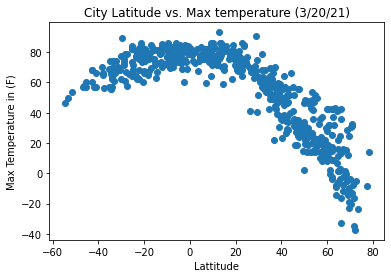

In [10]:
latitude = city_df['Lat']
temp= city_df['Max Temp']
fig1=plt.scatter(latitude, temp)
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature in (F)")
plt.title("City Latitude vs. Max temperature (3/20/21)")
plt.savefig("../output_data/fig1.png")

## Latitude vs. Humidity Plot

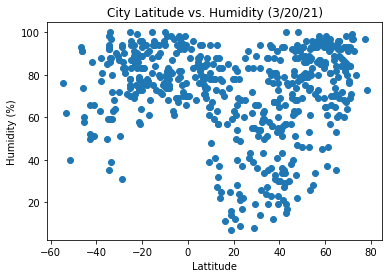

In [11]:
humidity= city_df['Humidity']
fig2=plt.scatter(latitude, humidity)
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (3/20/21)")
plt.savefig("../output_data/fig2.png")

## Latitude vs. Cloudiness Plot

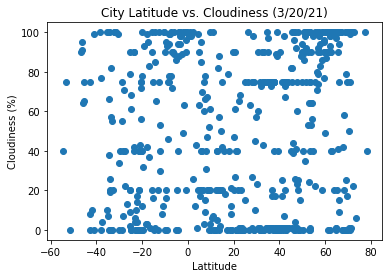

In [12]:
cloud= city_df['Cloudiness']
fig3=plt.scatter(latitude, cloud)
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (3/20/21)")
plt.savefig("../output_data/fig3.png")

## Latitude vs. Wind Speed Plot

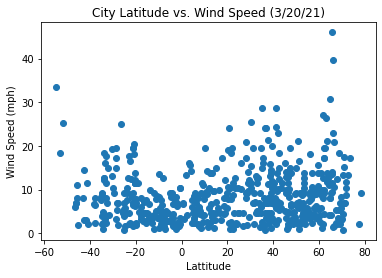

In [13]:
wind= city_df['Wind Speed']
fig4=plt.scatter(latitude, wind)
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (3/20/21)")
plt.savefig("../output_data/fig4.png")

## Linear Regression

In [14]:
north_df=city_df[city_df["Lat"] >= 0]

south_df=city_df[city_df["Lat"] <= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

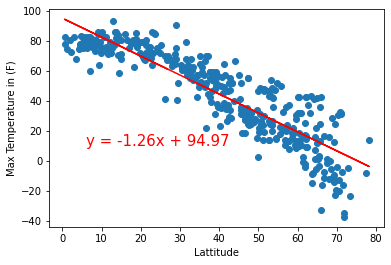

In [15]:
nlat = north_df['Lat']
ntemp= north_df['Max Temp']
fig5=plt.scatter(nlat, ntemp)
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature in (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ntemp)
regress_values = nlat * slope + intercept
plt.plot(nlat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("../output_data/fig5.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

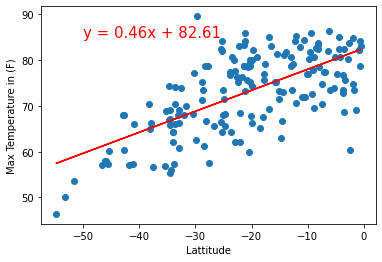

In [16]:
slat = south_df['Lat']
stemp= south_df['Max Temp']
fig6=plt.scatter(slat, stemp)
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature in (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, stemp)
regress_values = slat * slope + intercept
plt.plot(slat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.savefig("../output_data/fig6.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

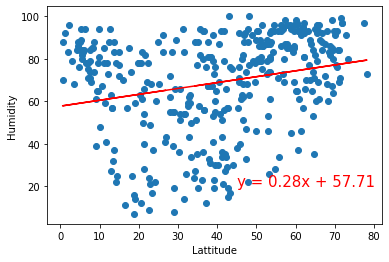

In [17]:
nlat = north_df['Lat']
nhum= north_df['Humidity']
fig7=plt.scatter(nlat, nhum)
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nhum)
regress_values = nlat * slope + intercept
plt.plot(nlat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.savefig("../output_data/fig7.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

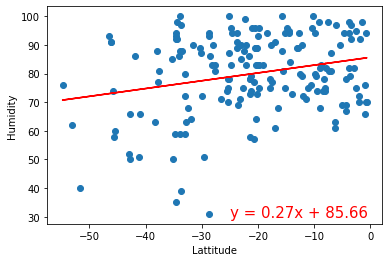

In [18]:
slat = south_df['Lat']
shum= south_df['Humidity']
fig8=plt.scatter(slat, shum)
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, shum)
regress_values = slat * slope + intercept
plt.plot(slat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.savefig("../output_data/fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

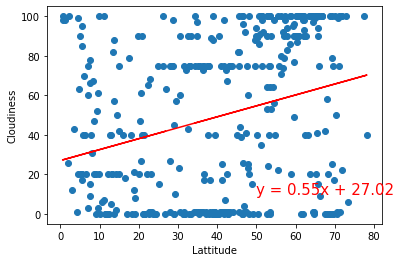

In [19]:
nlat = north_df['Lat']
nclo= north_df['Cloudiness']
fig9=plt.scatter(nlat, nclo)
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nclo)
regress_values = nlat * slope + intercept
plt.plot(nlat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.savefig("../output_data/fig9.png")




####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

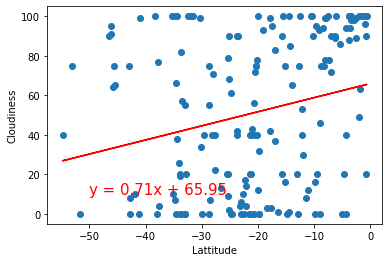

In [20]:
slat = south_df['Lat']
sclo= south_df['Cloudiness']
fig10=plt.scatter(slat, sclo)
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, sclo)
regress_values = slat * slope + intercept
plt.plot(slat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.savefig("../output_data/fig10.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

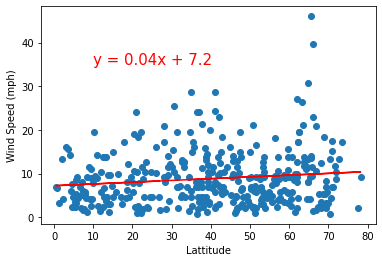

In [21]:
nlat = north_df['Lat']
nws= north_df['Wind Speed']
fig11=plt.scatter(nlat, nws)
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nws)
regress_values = nlat * slope + intercept
plt.plot(nlat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,35),fontsize=15,color="red")
plt.savefig("../output_data/fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

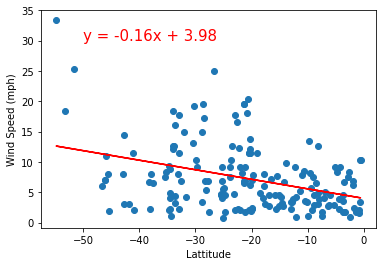

In [22]:
slat = south_df['Lat']
sws= south_df['Wind Speed']
fig12=plt.scatter(slat, sws)
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, sws)
regress_values = slat * slope + intercept
plt.plot(slat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.savefig("../output_data/fig12.png")
